# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./dataset.csv')

Show some information and statistics about the dataset

In [4]:
df.shape

(2312, 10)

In [5]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454.0,5150,U.S.A.,2019.0,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458.0,5150,U.S.A.,2019.0,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454.0,5150,U.S.A.,2019.0,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797.0,A. Morin,France,2012.0,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797.0,A. Morin,France,2012.0,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


In [6]:
df.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [7]:
df.describe(include='all')

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
count,2312.000000,2312,2312,2312.000000,2312,2312,2312,2224,2312,2312.000000
unique,NaN,541,67,NaN,63,1436,46,21,2270,NaN
top,NaN,Soma,U.S.A.,NaN,Venezuela,Madagascar,70%,"3- B,S,C","creamy, nutty, cocoa",NaN
freq,NaN,52,966,NaN,245,55,936,885,4,NaN
mean,1317.821367,NaN,NaN,2013.760813,NaN,NaN,NaN,NaN,NaN,3.184083
std,695.425750,NaN,NaN,3.591105,NaN,NaN,NaN,NaN,NaN,0.451961
min,5.000000,NaN,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,741.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,3.000000
50%,1351.000000,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,3.250000
75%,1912.000000,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.500000


### Transformations

Remove % symbol from Cocoa Percent and convert to float.

In [8]:
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype('float')

Add information about continent and sub-region (data from https://unstats.un.org/unsd/methodology/m49/).

In [9]:
countries = pd.read_excel('./country_data.xlsx')
countries = countries[['Region Name', 'Sub-region Name', 'Country or Area']]
countries.columns = ['Continent', 'Sub-region', 'Country']
countries.head()

,Continent,Sub-region,Country
0,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
2,Africa,Northern Africa,Libya
3,Africa,Northern Africa,Morocco
4,Africa,Northern Africa,Sudan


In [10]:
# Add Taiwan
countries = pd.concat([countries, pd.DataFrame([['Asia', 'Eastern Asia', 'Taiwan']], columns=countries.columns)], ignore_index=True)

Change some country names to match the datasets

In [11]:
df['Company Location'] = df['Company Location'].str.replace('Sao Tome & Principe', 'Sao Tome')
df['Company Location'] = df['Company Location'].str.replace('Amsterdam', 'Netherlands')
df['Company Location'] = df['Company Location'].str.replace('Scotland|Wales', 'U.K.')
df['Country of Bean Origin'] = df['Country of Bean Origin'].str.replace('Sao Tome & Principe|^Principe', 'Sao Tome')
df['Country of Bean Origin'] = df['Country of Bean Origin'].str.replace('Trinidad$|^Tobago', 'Trinidad and Tobago')
df['Country of Bean Origin'] = df['Country of Bean Origin'].str.replace('Sumatra|Sulawesi', 'Indonesia')
df['Country of Bean Origin'] = df['Country of Bean Origin'].str.replace('Bolvia', 'Bolivia')
df['Country of Bean Origin'] = df['Country of Bean Origin'].str.replace('blend', 'Blend')

In [12]:
countries['Country'] = countries['Country'].str.replace('United States of America', 'U.S.A.')
countries['Country'] = countries['Country'].str.replace('Russian Federation', 'Russia')
countries['Country'] = countries['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'U.K.')
countries['Country'] = countries['Country'].str.replace('Viet Nam', 'Vietnam')
countries['Country'] = countries['Country'].str.replace('Venezuela (Bolivarian Republic of)', 'Venezuela', regex=False)
countries['Country'] = countries['Country'].str.replace('Republic of Korea', 'South Korea')
countries['Country'] = countries['Country'].str.replace('Sao Tome and Principe', 'Sao Tome')
countries['Country'] = countries['Country'].str.replace('Saint Lucia', 'St. Lucia')
countries['Country'] = countries['Country'].str.replace('Bolivia (Plurinational State of)', 'Bolivia', regex=False)
countries['Country'] = countries['Country'].str.replace('Saint Vincent and the Grenadines', 'St.Vincent-Grenadines')
countries['Country'] = countries['Country'].str.replace('Czechia', 'Czech Republic')
countries['Country'] = countries['Country'].str.replace('United Arab Emirates', 'U.A.E.')
countries['Country'] = countries['Country'].str.replace('United Republic of Tanzania', 'Tanzania')
countries['Country'] = countries['Country'].str.replace('Democratic Republic of the Congo', 'DR Congo')
countries['Country'] = countries['Country'].str.replace('Côte d’Ivoire', 'Ivory Coast')
countries['Country'] = countries['Country'].str.replace('Myanmar', 'Burma')

In [13]:
df = df.merge(countries.rename(lambda s: s+'_comp_loc', axis=1), 
              how='left', 
              right_on='Country_comp_loc', 
              left_on='Company Location').drop('Country_comp_loc', axis=1)

In [14]:
df = df.merge(countries.rename(lambda s: s+'_origin', axis=1), 
              how='left', 
              right_on='Country_origin', 
              left_on='Country of Bean Origin').drop('Country_origin', axis=1)

In [15]:
df = df.fillna({'Continent_origin':'Blend', 'Sub-region_origin':'Blend', 'Country_origin':'Blend'})

In [16]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Continent_comp_loc,Sub-region_comp_loc,Continent_origin,Sub-region_origin
0,2454.0,5150,U.S.A.,2019.0,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Americas,Northern America,Africa,Sub-Saharan Africa
1,2458.0,5150,U.S.A.,2019.0,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,Americas,Northern America,Americas,Latin America and the Caribbean
2,2454.0,5150,U.S.A.,2019.0,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,Americas,Northern America,Africa,Sub-Saharan Africa
3,797.0,A. Morin,France,2012.0,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,Europe,Western Europe,Americas,Latin America and the Caribbean
4,797.0,A. Morin,France,2012.0,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,Europe,Western Europe,Americas,Latin America and the Caribbean


## Data Exploration

Check columns one by one.

### Rating (target variable)

In [17]:
df['Rating'].describe()

count    2312.000000
mean        3.184083
std         0.451961
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

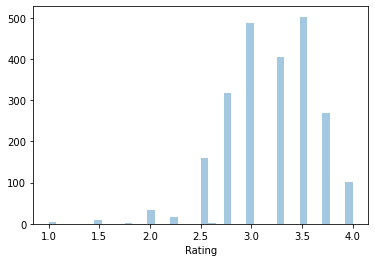

In [18]:
sns.distplot(df['Rating'], kde=False);

Let's plot a correlation matrix to check whether the rating is correlated to any numerical variable.

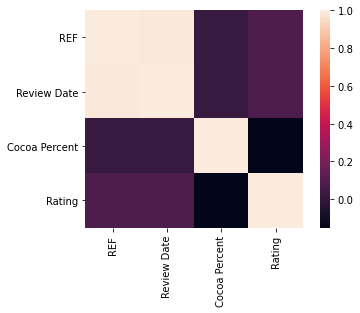

In [19]:
corrmat = df.corr()
sns.heatmap(corrmat, square=True);

It looks like Rating is not correlated to any of them.

However this plot confirms, as we expected from the dataset description, that REF is correlated with Review Date.

---

Plot distribution of ratings over years.

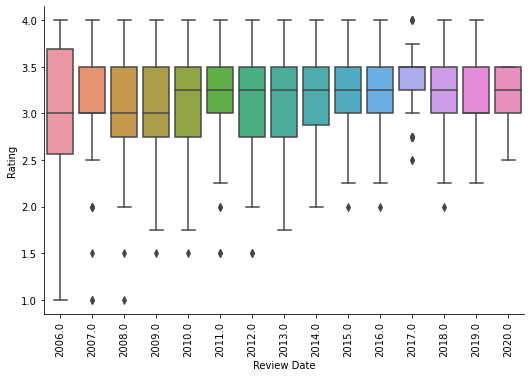

In [50]:
sns.catplot(x="Review Date", y="Rating", kind="box", aspect=1.5, data=df)
plt.xticks(rotation=90);

Plot distribution of rating of most frequent companies.

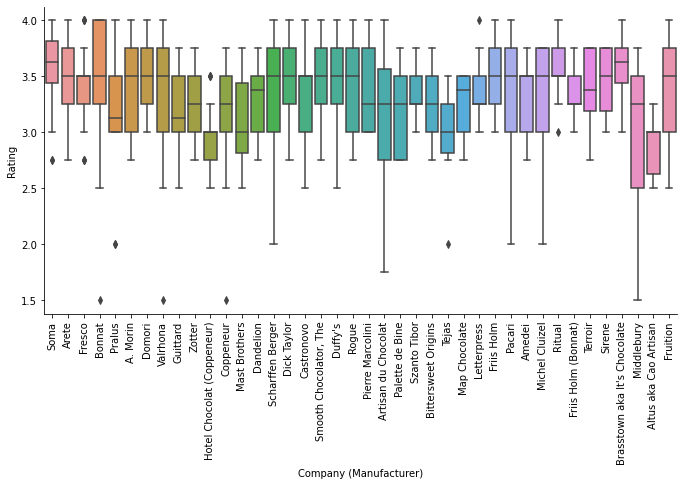

In [67]:
most_freq = df['Company (Manufacturer)'].value_counts()[:40].index
sns.catplot(x="Company (Manufacturer)", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company (Manufacturer)'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent company locations.

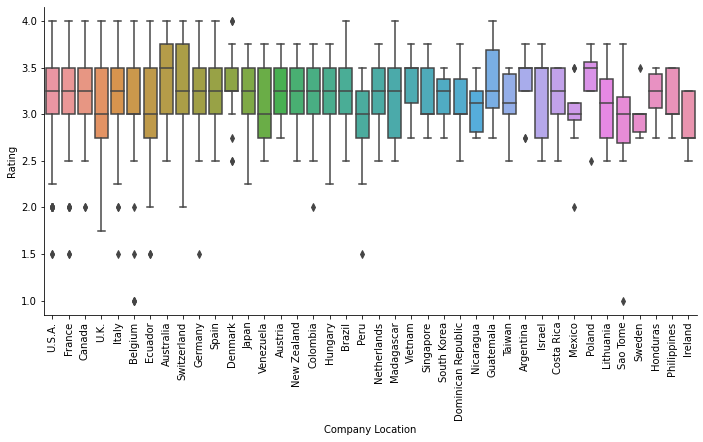

In [71]:
most_freq = df['Company Location'].value_counts()[:40].index
sns.catplot(x="Company Location", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company Location'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent countries of origin.

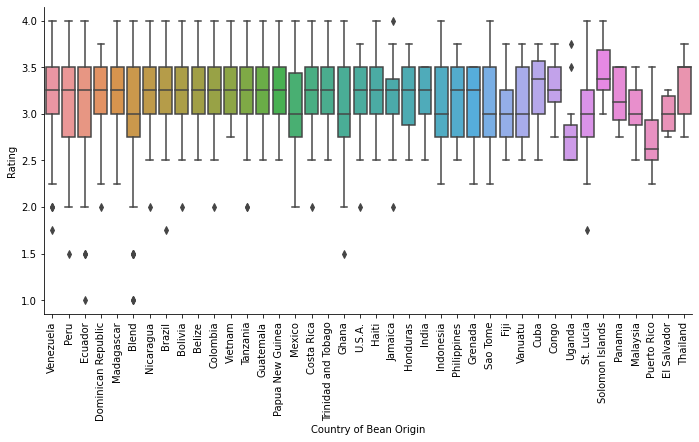

In [72]:
most_freq = df['Country of Bean Origin'].value_counts()[:40].index
sns.catplot(x="Country of Bean Origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Country of Bean Origin'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent continents of origin.

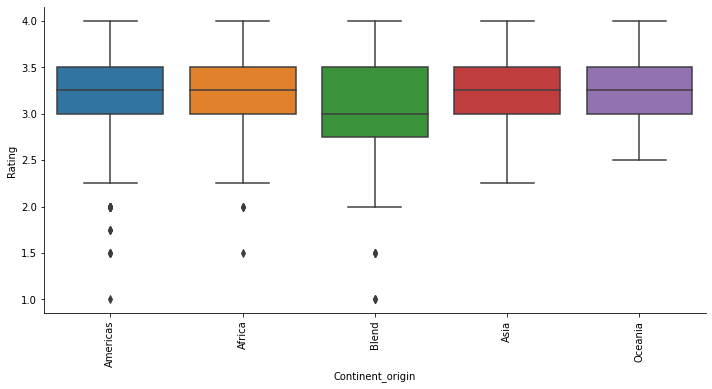

In [73]:
most_freq = df['Continent_origin'].value_counts()[:40].index
sns.catplot(x="Continent_origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Continent_origin'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent sub-regions of origin.

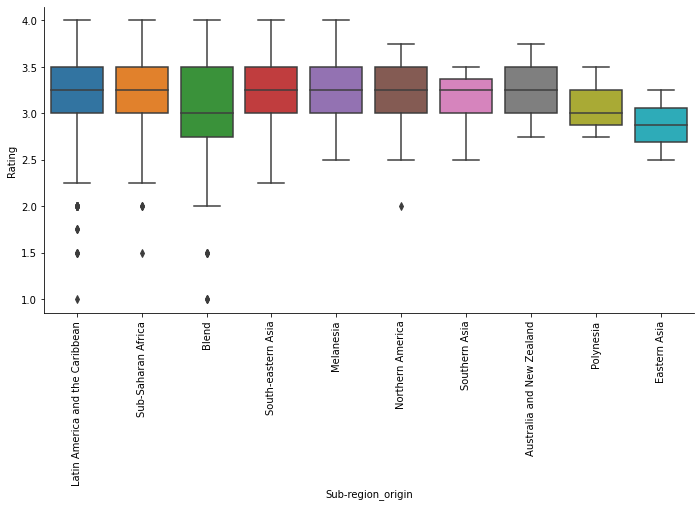

In [74]:
most_freq = df['Sub-region_origin'].value_counts()[:40].index
sns.catplot(x="Sub-region_origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Sub-region_origin'].isin(most_freq)])
plt.xticks(rotation=90);

### Review Date

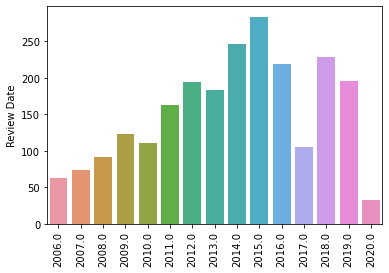

In [25]:
values = df['Review Date'].value_counts()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

### Company (Manufacturer)

Plot only first 40 companies.

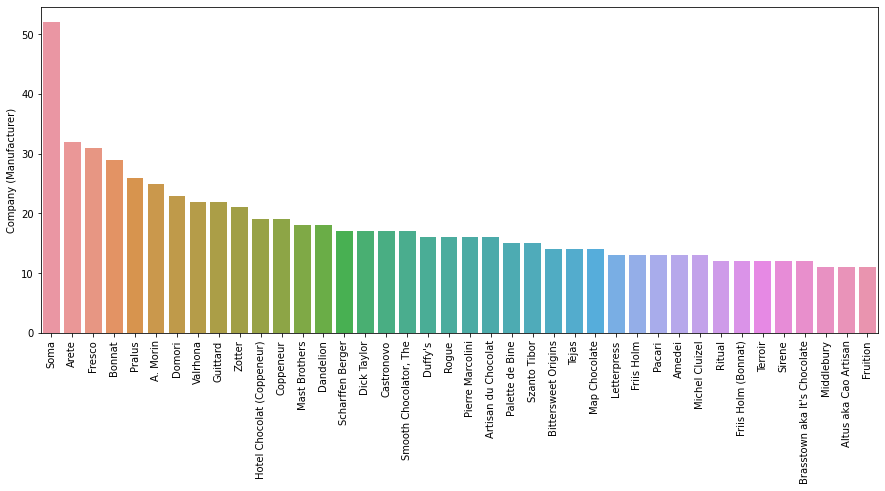

In [55]:
values = df['Company (Manufacturer)'].value_counts()[:40]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

### Company Location

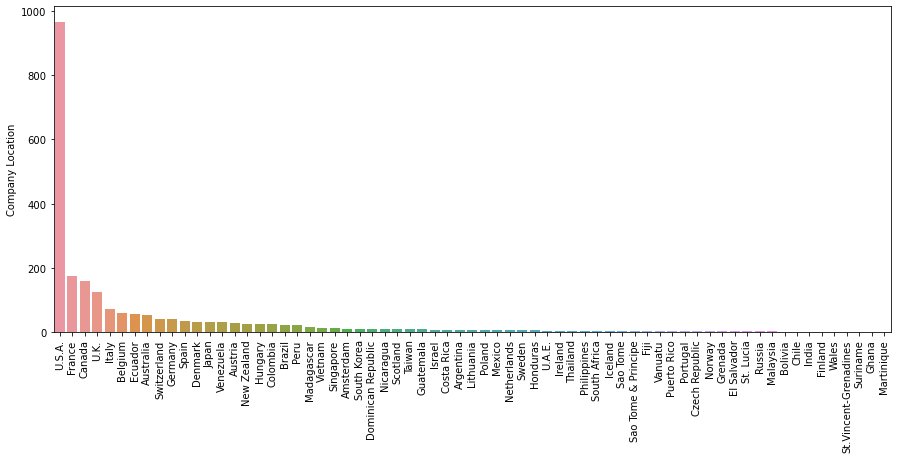

In [96]:
values = df['Company Location'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

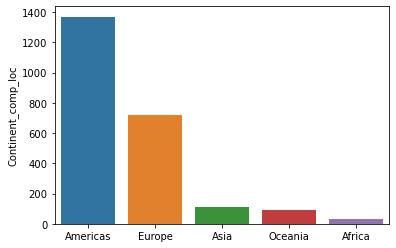

In [402]:
values = df['Continent_comp_loc'].value_counts()
sns.barplot(x=values.index, y=values)

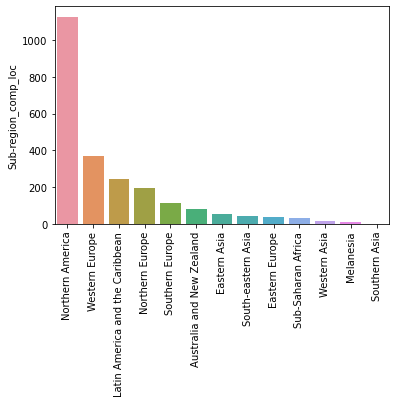

In [405]:
values = df['Sub-region_comp_loc'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

### Country of Bean Origin

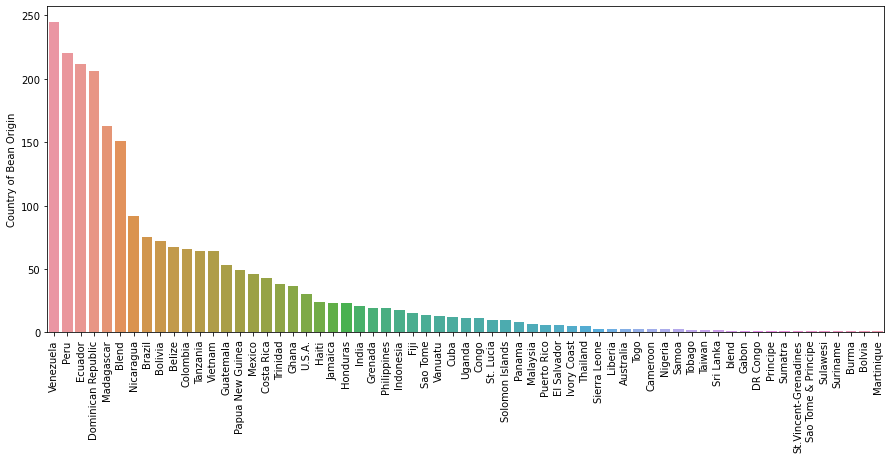

In [97]:
values = df['Country of Bean Origin'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

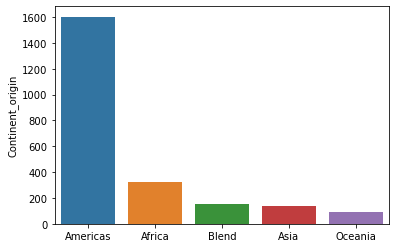

In [406]:
values = df['Continent_origin'].value_counts()
sns.barplot(x=values.index, y=values);

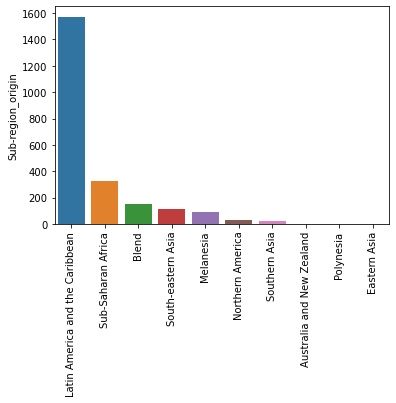

In [407]:
values = df['Sub-region_origin'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

### Specific Bean Origin or Bar Name

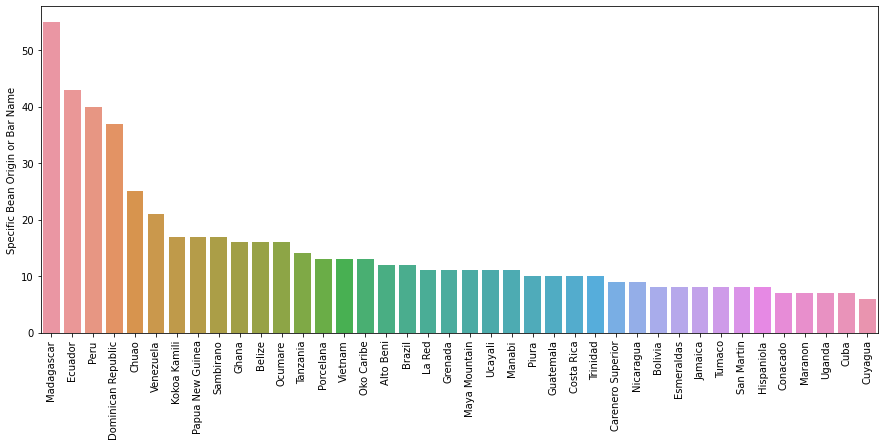

In [98]:
values = df['Specific Bean Origin or Bar Name'].value_counts()[:40]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

### Cocoa Percent

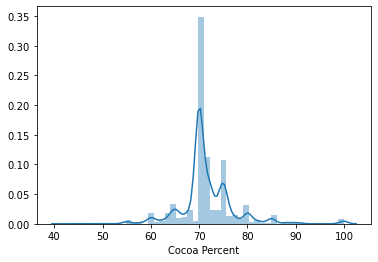

In [102]:
sns.distplot(df['Cocoa Percent']);

### Ingredients

From http://flavorsofcacao.com:

> "#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt

For each of the above ingredients, let's create a column which indicates whether that ingredient is used or not.

In [10]:
# Remove numbers, dashes and spaces
df['Ingredients'] = df['Ingredients'].str.replace('[\s\d-]', '')

ingredient_dummies = df['Ingredients'].str.get_dummies(sep=',')
ingredient_dummies.head()

,B,C,L,S,S*,Sa,V
0,1,1,0,1,0,0,0
1,1,1,0,1,0,0,0
2,1,1,0,1,0,0,0
3,1,1,1,1,0,0,0
4,1,1,1,1,0,0,0


Let's plot for each ingredient the percentage of bars that contain it.

In [11]:
values = ingredient_dummies.sum() / df.shape[0]
values

B     0.961938
C     0.663927
L     0.207180
S     0.926471
S*    0.032872
Sa    0.016003
V     0.150519
dtype: float64

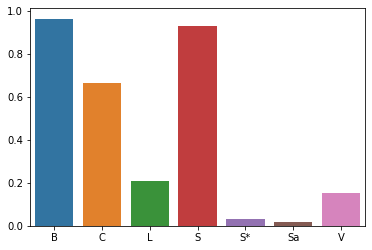

In [12]:
sns.barplot(x=values.index, y=values);

### Most Memorable Characteristics

In [16]:
df['Most Memorable Characteristics'].head(20)

0        cocoa, blackberry, full body
1              cocoa, vegetal, savory
2           rich cocoa, fatty, bready
3               fruity, melon, roasty
4                      vegetal, nutty
5       oily, nut, caramel, raspberry
6             sweet, cocoa, tangerine
7            sandy, nutty, cocoa, fig
8        cocoa,sour,intense tangerine
9                        mild tobacco
10           mild fruit, strong smoke
11                green, nutty, cocoa
12            sticky, red fruit, sour
13              sticky, smokey, grass
14    brief fruit note, earthy, nutty
15       burnt rubber,alkalyzed notes
16        delicate, hazelnut, brownie
17      astringent, nutty, chocolatey
18                sliglty dry, papaya
19          nutty, mild choco, roasty
Name: Most Memorable Characteristics, dtype: object

Let's create dummies for characteristics.

In [43]:
def preprocess_char(s):
    # Transform characteristics into a comma-separated list without spaces
    result = s.lower().replace(' and ', ',').split(',')
    return ','.join(list(map(lambda x: x.strip(), result)))

characteristic_dummies = df['Most Memorable Characteristics'].apply(preprocess_char)
characteristic_dummies = characteristic_dummies.str.get_dummies(sep=',')
characteristic_dummies.head()

,"""andes"" mint",accesible,accessible,acidic,alcohol,alkalyzed notes,alluring aroma,almond,almond butter,almost burnt,...,wild berry,wine,winey,wood,woodsy,woody,wtf,xl nibs,yellow fruit,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's show the most frequent characteristics

In [49]:
values = (characteristic_dummies.sum() / df.shape[0]).sort_values(ascending=False)
values.head(10)

sweet     0.108564
nutty     0.105536
cocoa     0.094291
roasty    0.086938
creamy    0.080450
earthy    0.074827
sandy     0.068772
fatty     0.066609
floral    0.059689
spicy     0.058391
dtype: float64

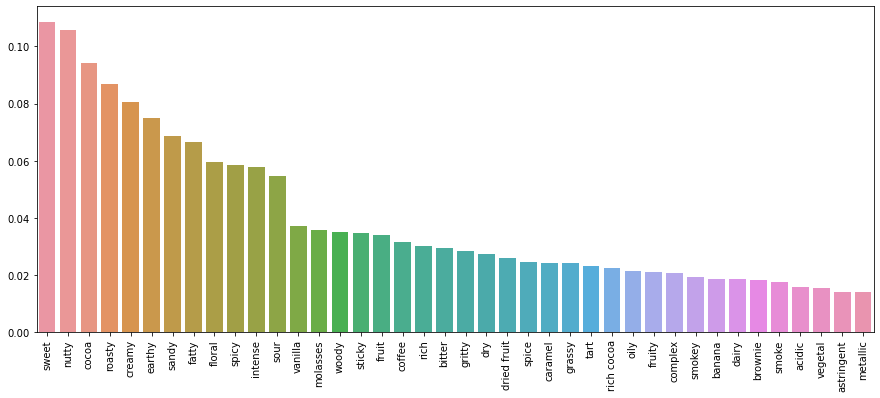

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values[:40].index, y=values[:40])
plt.xticks(rotation=90);